# 3. Préparation des données

## 3.1 Exploration des données
- Charger les fichiers `table1.csv` et `table2.csv`
- Afficher les premières lignes des fichiers pour un aperçu général
- Vérifier les types de données et la structure des tables
- Calculer des statistiques descriptives :
  - Moyenne, médiane, écart-type pour les valeurs numériques
  - Valeurs modales pour les catégories
  - Distribution des valeurs avec des histogrammes et boxplots
- Identifier les corrélations entre les variables pertinentes

## 3.2 Nettoyage des données
- **Gestion des valeurs manquantes** :
  - Identifier les attributs avec des valeurs manquantes
  - Appliquer des stratégies adaptées (imputation par moyenne/mode/médiane ou suppression)
- **Traitement des valeurs aberrantes** :
  - Détection par des méthodes statistiques (IQR, z-score)
  - Correction ou suppression des valeurs extrêmes
- **Correction des incohérences** :
  - Vérifier la validité des dates (`DTNAIS`, `DTADH`, `DTDEM`)
  - Harmoniser les formats de variables catégorielles (`CDSEXE`, `CDMOTDEM`)
  - Supprimer les valeurs indiquant une absence d’information (`0000-00-00`, `31/12/1900`)

## 3.3 Fusion des données
- Vérifier la correspondance des attributs communs entre `table1.csv` et `table2.csv`
- Définir la stratégie de fusion :
  - Jointure sur des attributs communs (`CDMOTDEM`, `CDCATCL`)
  - Création d’une table unique si pertinent
- Comparer les effets de différentes stratégies de fusion sur la qualité des données

## 3.4 Recodage des variables
- **Discrétisation des attributs continus** :
  - Tranches d’âge (`AGEAD`, `AGEDEM`)
  - Catégorisation du montant des revenus (`MTREV`)
- **Encodage des variables catégorielles** :
  - One-hot encoding (`CDSEXE`, `CDCATCL`)
  - Ordinal encoding pour les variables ordonnées
- **Normalisation des variables numériques** :
  - Standardisation (z-score)
  - Min-max scaling

## 3.5 Prétraitement des données
- **Réduction de la dimensionnalité** :
  - Analyse en composantes principales (PCA) pour visualiser les données
  - Sélection des variables les plus pertinentes
- **Détection et suppression des attributs redondants**
- **Équilibrage des classes si nécessaire** (techniques de suréchantillonnage/sous-échantillonnage)

## 3.6 Découpage des données
- Séparer les données en trois ensembles :
  - **Ensemble d’apprentissage** (~70%)
  - **Ensemble de validation** (~15%)
  - **Ensemble de test** (~15%)
- Vérifier la représentativité des classes après découpage
- Appliquer la même transformation aux trois ensembles pour garantir la cohérence

---
**Résultats attendus** :
- Rapport d’analyse descriptive avec graphiques
- Tableau des actions de nettoyage appliquées
- Justification des choix de fusion, recodage et prétraitement
- Enregistrements des jeux de données transformés en fichiers `.csv` prêts pour l’analyse


## Préparation des données

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

## Fonctions utilitaires

In [5]:
def create_pie_chart(df, column_name, title=None, figsize=(6, 6), colors=None):
    """
    Crée un diagramme circulaire (pie chart) pour une colonne catégorielle d'un dataframe

    Parameters:
    -----------
    df : pandas.DataFrame
        Le dataframe contenant les données
    column_name : str
        Le nom de la colonne catégorielle à visualiser
    title : str, optional
        Le titre du graphique (par défaut, utilisera "Répartition de la colonne '{column_name}'")
    figsize : tuple, optional
        La taille de la figure (largeur, hauteur) en pouces (par défaut (6, 6))
    colors : list, optional
        Liste de couleurs à utiliser pour les secteurs (par défaut, utilise les couleurs par défaut de matplotlib)

    Returns:
    --------
    fig, ax : objets matplotlib
        La figure et l'axe créés, permettant des modifications supplémentaires si nécessaire
    """
    # Vérifier si la colonne existe dans le dataframe
    if column_name not in df.columns:
        raise ValueError(f"La colonne '{column_name}' n'existe pas dans le dataframe")

    # Compter les occurrences des valeurs dans la colonne
    value_counts = df[column_name].value_counts()

    # Créer la figure et l'axe
    fig, ax = plt.subplots(figsize=figsize)

    # Créer le pie chart
    wedges, texts, autotexts = ax.pie(
        value_counts,
        labels=value_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors
    )

    # Améliorer la lisibilité du texte
    for text in texts:
        text.set_fontsize(10)
    for autotext in autotexts:
        autotext.set_fontsize(8)
        autotext.set_color('white')

    # Définir le titre
    if title is None:
        title = f"Répartition de la colonne '{column_name}'"
    ax.set_title(title)

    # Ajuster la mise en page
    plt.tight_layout()

    return fig, ax

## Exploration

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# !unzip "/content/drive/MyDrive/application-bi/donnees_banque.zip" -d "/content/drive/MyDrive/application-bi/"
BASE_DATA_PATH = "/content/drive/MyDrive/application-bi/"
# BASE_DATA_PATH = "donnees_banque/"


### 1. Charger les donnees

In [8]:
path_fichier1 = os.path.join(BASE_DATA_PATH, "table1.csv")
path_fichier2 = os.path.join(BASE_DATA_PATH, "table2.csv")
df1 = pd.read_csv(path_fichier1)
df2 = pd.read_csv(path_fichier2)

### 2.Renommer les colones

In [9]:
# Dictionnaire de renommage des colonnes
rename_dict_df1 = {
    "ID": "ID",
    "CDSEXE": "Sexe",
    "MTREV": "RevenuMontant",
    "NBENF": "NombreEnfants",
    "CDSITFAM": "SituationFamiliale",
    "DTADH": "DateAdhesion",
    "CDTMT": "StatutSocietaireCode",
    "CDDEM": "DemissionCode",
    "DTDEM": "DateDemission",
    "ANNEEDEM": "AnneeDemission",
    "CDMOTDEM": "MotifDemissionCode",
    "CDCATCL": "ClientTypeCode",
    "AGEAD": "AgeAdhesion",
    "RANGAGEAD": "TrancheAgeAdhesion",
    "AGEDEM": "AgeDemission",
    "RANGAGEDEM": "TrancheAgeDemission",
    "RANGDEM": "DateDemissionCode",
    "ADH": "DureeAdhesion",
    "RANGADH": "TrancheDureeAdhesion"
}

# Dictionnaire de renommage des colonnes pour le second DataFrame
rename_dict_df2 = {
    "ID": "ID",
    "CDSEXE": "Sexe",
    "DTNAIS": "DateNaissance",
    "MTREV": "RevenuMontant",
    "NBENF": "NombreEnfants",
    "CDSITFAM": "SituationFamiliale",
    "DTADH": "DateAdhesion",
    "CDTMT": "StatutSocietaireCode",
    "CDMOTDEM": "MotifDemissionCode",
    "CDCATCL": "ClientTypeCode",
    "BPADH": "ColonneInconnue",
    "DTDEM": "DateDemission" # Date de démission, ou 31/12/1900 si non-démissionnaire
}

# Renommage des colonnes
df1.rename(columns=rename_dict_df1, inplace=True)
df2.rename(columns=rename_dict_df2, inplace=True)


In [10]:
df1.isna().sum()

,0
ID,0
Sexe,0
RevenuMontant,0
NombreEnfants,0
SituationFamiliale,0
DateAdhesion,0
StatutSocietaireCode,0
DemissionCode,0
DateDemission,0
AnneeDemission,0


In [11]:
df1['TrancheDureeAdhesion'].value_counts()
df1.dtypes

,0
ID,int64
Sexe,int64
RevenuMontant,int64
NombreEnfants,int64
SituationFamiliale,object
DateAdhesion,object
StatutSocietaireCode,int64
DemissionCode,int64
DateDemission,object
AnneeDemission,int64


In [12]:
df2.head()

,ID,Sexe,DateNaissance,RevenuMontant,NombreEnfants,SituationFamiliale,DateAdhesion,StatutSocietaireCode,MotifDemissionCode,ClientTypeCode,ColonneInconnue,DateDemission
0,1,1,0000-00-00,0,0,A,30/11/1998,0,NaN,98,0,31/12/1900
1,2,2,02/09/1939,0,0,M,21/02/1968,2,NaN,10,10807,31/12/1900
2,3,3,27/04/1941,1524,0,M,20/01/1970,2,NaN,10,16807,31/12/1900
3,4,2,05/03/1931,0,0,A,15/06/1970,0,DC,21,10807,31/12/1900
4,5,2,25/08/1935,1722,0,G,16/06/1970,2,NaN,10,10807,31/12/1900


### Vérifier les types de données et la structure des tables

#### 1. Table 1

In [13]:
df1.dtypes

,0
ID,int64
Sexe,int64
RevenuMontant,int64
NombreEnfants,int64
SituationFamiliale,object
DateAdhesion,object
StatutSocietaireCode,int64
DemissionCode,int64
DateDemission,object
AnneeDemission,int64


| Type de Données  | Colonnes |
|-----------------|----------------------------------------------------------------|
| **Entiers**     | `ID`, `Sexe`, `NombreEnfants`, `StatutSocietaireCode`, `MotifDemissionCode`, `ClientTypeCode` |
| **Object** (Dates incluses) | `DateNaissance`, `DateAdhesion`, `DateDemission`, `SituationFamiliale`, `BanquePrincipaleAdhesion`, `TrancheAgeAdhesion`, `TrancheAgeDemission`, `TrancheDureeAdhesion`|






*  `DateAdhesion` et `DateDemission` sont sous format date.

Par contre `DateDemissionCode` est sous cette la forme `N AAAA (code puis année)`
* `TrancheAgeAdhesion`, `TrancheAgeDemission`, `TrancheDureeAdhesion` sont sous la forme `N AAAA (code puis intervalle d'age)` N peut etre un entier ou une lettre `a` ou `b` par exemple.



La colonnes sont a convertir en date.

#### Table 2:

In [14]:
df2.head(10)

,ID,Sexe,DateNaissance,RevenuMontant,NombreEnfants,SituationFamiliale,DateAdhesion,StatutSocietaireCode,MotifDemissionCode,ClientTypeCode,ColonneInconnue,DateDemission
0,1,1,0000-00-00,0,0,A,30/11/1998,0,NaN,98,0,31/12/1900
1,2,2,02/09/1939,0,0,M,21/02/1968,2,NaN,10,10807,31/12/1900
2,3,3,27/04/1941,1524,0,M,20/01/1970,2,NaN,10,16807,31/12/1900
3,4,2,05/03/1931,0,0,A,15/06/1970,0,DC,21,10807,31/12/1900
4,5,2,25/08/1935,1722,0,G,16/06/1970,2,NaN,10,10807,31/12/1900
5,6,3,01/11/1937,0,0,D,18/05/1971,2,NaN,10,13907,31/12/1900
6,7,3,14/01/1934,0,0,A,19/08/1971,0,NaN,10,11307,31/12/1900
7,8,2,06/05/1933,0,0,B,19/07/1972,0,DV,21,10807,14/02/2001
8,9,4,26/09/1947,4300,0,C,18/04/1977,2,NaN,10,16807,31/12/1900
9,10,3,14/06/1942,0,0,A,06/02/1980,0,DV,21,16807,25/05/1998


Pas de particularite sur les colonnes sur la **Table 2**

### Analyse descriptive

#### Table 1:

In [15]:
df1.describe()

,ID,Sexe,RevenuMontant,NombreEnfants,StatutSocietaireCode,DemissionCode,AnneeDemission,ClientTypeCode,AgeAdhesion,AgeDemission,DureeAdhesion
count,30332.000000,30332.000000,3.033200e+04,30332.000000,30332.000000,30332.000000,30332.000000,30332.000000,30332.000000,30332.000000,30332.000000
mean,15166.500000,2.681656,2.890012e+02,0.201998,0.097389,1.999868,2003.156732,21.002934,38.037485,50.086246,12.048760
std,8756.238519,0.670356,8.959197e+03,0.636844,0.431382,0.011483,2.184697,1.635919,11.573183,14.505487,9.051472
min,1.000000,2.000000,0.000000e+00,0.000000,0.000000,1.000000,1999.000000,10.000000,19.000000,19.000000,0.000000
25%,7583.750000,2.000000,0.000000e+00,0.000000,0.000000,2.000000,2001.000000,21.000000,28.000000,38.000000,4.000000
50%,15166.500000,3.000000,0.000000e+00,0.000000,0.000000,2.000000,2004.000000,21.000000,36.000000,50.000000,11.000000
75%,22749.250000,3.000000,0.000000e+00,0.000000,0.000000,2.000000,2005.000000,21.000000,46.000000,61.000000,20.000000
max,30332.000000,4.000000,1.524490e+06,6.000000,6.000000,2.000000,2006.000000,40.000000,89.000000,102.000000,34.000000


In [16]:
df1.isnull().sum()

,0
ID,0
Sexe,0
RevenuMontant,0
NombreEnfants,0
SituationFamiliale,0
DateAdhesion,0
StatutSocietaireCode,0
DemissionCode,0
DateDemission,0
AnneeDemission,0


La colonne TranceDureeAdhesion est la seule avec des donnees manqantes. Cependant il est important de noter que certaines colonne ont des conventions pour la representation des donnees manquantes.

##### 1. Sexe


| Statistique | Valeur  |
|------------|--------|
| **Min**    | 2      |
| **Moyenne**| 2.68   |
| **Max**    | 4      |

**Interprétation :**  
Les valeurs de la colonne `Sexe` vont de **2 à 4**.  


In [17]:
df1.Sexe.isnull().sum()

np.int64(0)

In [18]:
df1['Sexe'].value_counts()

,count
Sexe,
3,13628
2,13180
4,3524


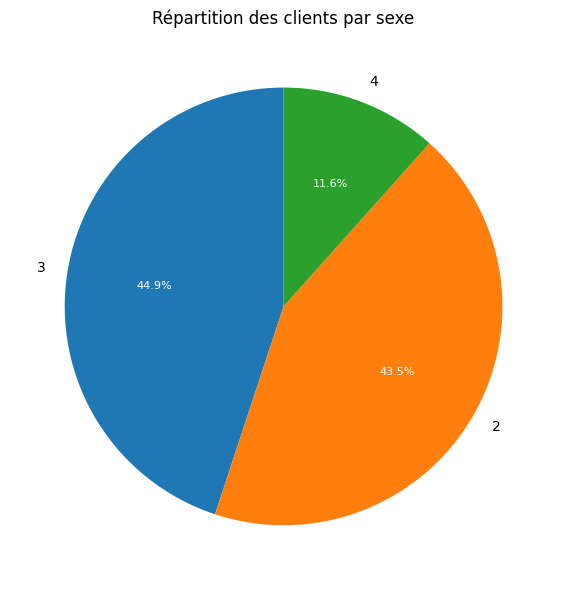

In [19]:
fig, ax = create_pie_chart(df1, 'Sexe', "Répartition des clients par sexe")
plt.show()

##### 2. RevenueMontant

| Statistique | Valeur      |
|------------|------------|
| **Min**    | 0          |
| **Moyenne**| 289.0      |
| **Max**    | 1,524,490  |

**Interprétation :**  
Le revenu varie de **0 à 1,524,490**, avec une moyenne de **289.0**.  
- Un minimum de **0** peut être normal si certaines personnes n’ont aucun revenu déclaré.  
- Un maximum très élevé indique la présence de **revenus très importants**, probablement des outliers à analyser.  
- L'écart étant grand, une **analyse plus approfondie (médiane, distribution)** serait utile pour mieux comprendre la répartition des revenus.

In [20]:
df1['RevenuMontant'].isnull().sum()

np.int64(0)

In [21]:
# all the statistics for this column
df1['RevenuMontant'].describe()

,RevenuMontant
count,3.033200e+04
mean,2.890012e+02
std,8.959197e+03
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,1.524490e+06


In [22]:
(df1['RevenuMontant'] == 0).sum() /df1.shape[0]

np.float64(0.8917974416457867)

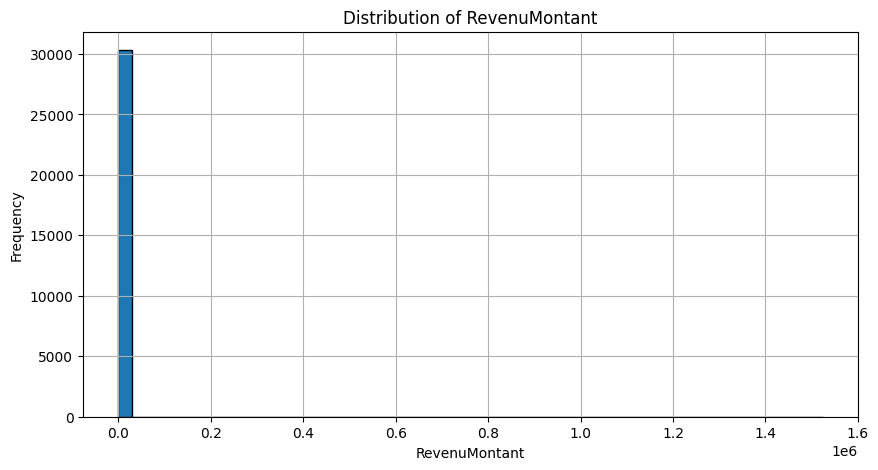

In [23]:
plt.figure(figsize=(10, 5))
df1['RevenuMontant'].hist(bins=50, edgecolor='black')
plt.xlabel('RevenuMontant')
plt.ylabel('Frequency')
plt.title('Distribution of RevenuMontant')
plt.show()


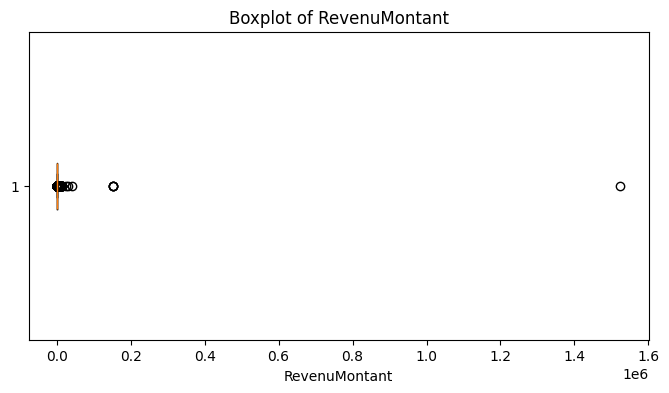

In [24]:
plt.figure(figsize=(8, 4))
plt.boxplot(df1['RevenuMontant'], vert=False)
plt.xlabel('RevenuMontant')
plt.title('Boxplot of RevenuMontant')
plt.show()


**Conclusion**:

* Pres de 90% des donnees de cette colonne sont 0.
* Des donnees qui semblent etres aberantes car trop eloinges des autres donnees






##### 3. NombreEnfants

| Statistique | Valeur  |
|------------|--------|
| **Min**    | 0      |
| **Moyenne**| 0.20   |
| **Max**    | 6      |

**Interprétation :**  
Le nombre d'enfants varie de **0 à 6**, avec une moyenne de **0.20**.  
- Un minimum de **0** est attendu, car certaines personnes n'ont pas d'enfants.  
- Une moyenne aussi basse indique que la majorité des individus ont peu ou pas d'enfants.  
- Un maximum de **6** semble plausible


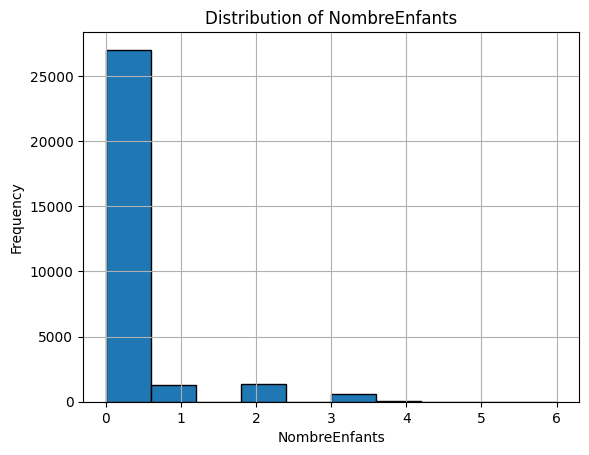

In [25]:
df1['NombreEnfants'].hist(bins=10, edgecolor='black')
plt.xlabel('NombreEnfants')
plt.ylabel('Frequency')
plt.title('Distribution of NombreEnfants')
plt.show()

##### 4. StatutSocietaireCode  

| Statistique | Valeur  |
|------------|--------|
| **Min**    | 0      |
| **Moyenne**| 0.097  |
| **Max**    | 6      |

**Interprétation :**  
Les valeurs de la colonne `StatutSocietaireCode` vont de **0 à 6**, avec une moyenne très faible (**0.097**).  
- Cela suggère que la majorité des individus appartiennent à la catégorie **0**.  
- La présence d'un maximum de **6** pourrait nécessiter une clarification sur la signification des codes. 📌  



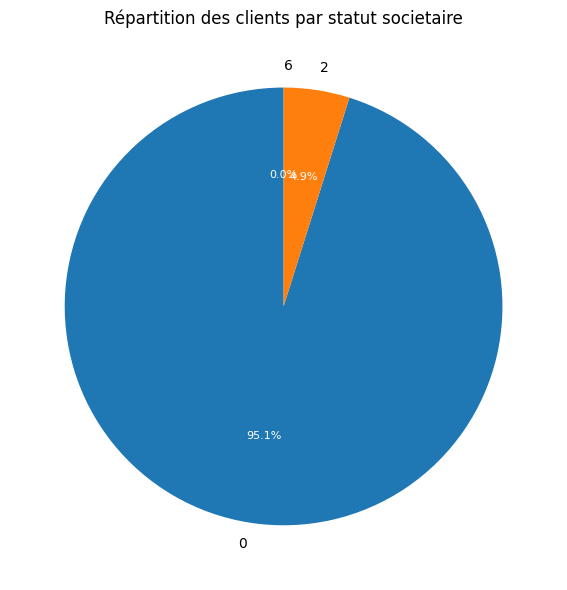

In [26]:
# pie chart
fig, ax = create_pie_chart(df1, 'StatutSocietaireCode', "Répartition des clients par statut societaire")
plt.show()

##### 5. DemissionCode  

| Statistique | Valeur  |
|------------|--------|
| **Min**    | 0      |
| **Moyenne**| 0.097  |
| **Max**    | 6      |

**Interprétation :**  
La colonne `DemissionCode` contient des valeurs allant de **0 à 6**, avec une moyenne faible (**0.097**).  
- Un minimum de **0** peut indiquer l'absence de démission.  
- La faible moyenne suggère que peu de personnes quittent le système.  
- Un maximum de **6** est surprenant : il serait utile de vérifier s’il y a bien **6 catégories** ou s'il s'agit d'erreurs. 🤔  


##### 6. AnneeDemission  

| Statistique | Valeur  |
|------------|--------|
| **Min**    | 1999   |
| **Moyenne**| 2003.16 |
| **Max**    | 2006   |

**Interprétation :**  
L’année de démission varie entre **1999 et 2006**, avec une moyenne autour de **2003**.  
- Ces valeurs semblent cohérentes si la période d'observation est limitée à ces années.  
- Il pourrait être intéressant d’analyser les tendances des démissions par année pour voir s’il y a des pics.

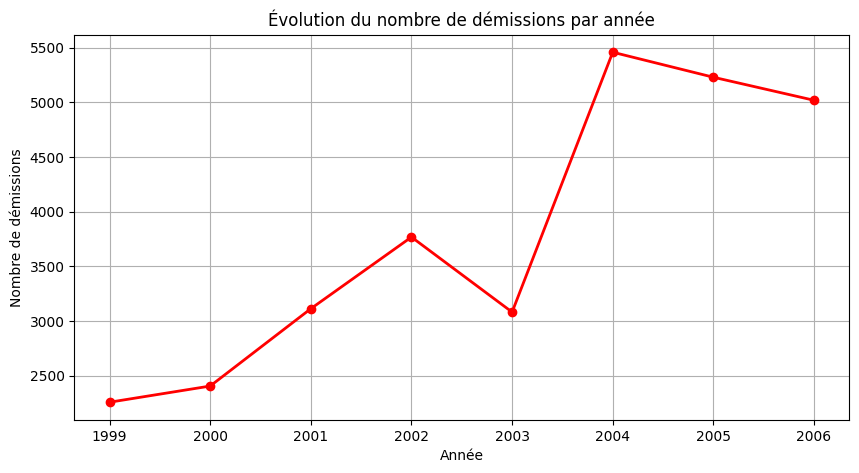

In [27]:
# Compter le nombre de démissions par année
demission_par_annee = df1.groupby('AnneeDemission').size()

# Tracer le graphique en ligne
plt.figure(figsize=(10, 5))
plt.plot(demission_par_annee.index, demission_par_annee.values, marker='o', linestyle='-', color='r', linewidth=2)

# Ajouter les labels et le titre en français
plt.xlabel("Année")
plt.ylabel("Nombre de démissions")
plt.title("Évolution du nombre de démissions par année")
plt.grid(True)

# Afficher le graphique
plt.show()

On voit que la tendance indique le plus faible nombre de demission en 1999. Le pic de demission est en 2004.

##### 7.AgeAdhesion	; AgeDemission;	DureeAdhesion

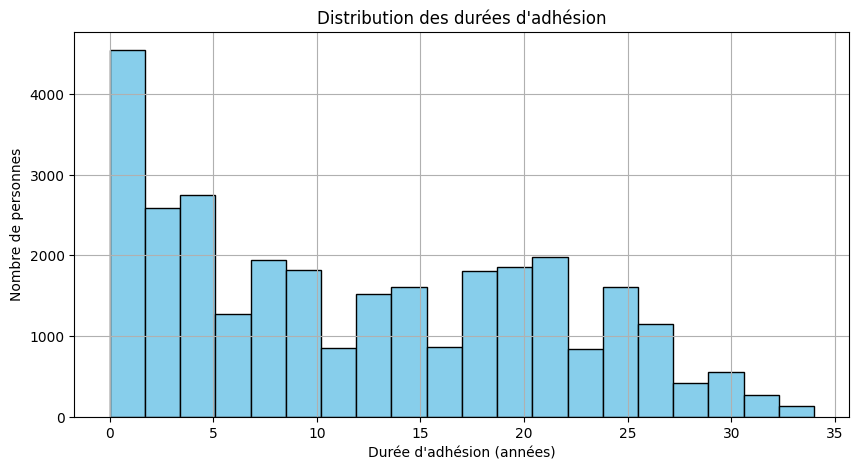

In [28]:
plt.figure(figsize=(10, 5))
plt.hist(df1['DureeAdhesion'], bins=20, edgecolor='black', color='skyblue')
plt.xlabel("Durée d'adhésion (années)")
plt.ylabel("Nombre de personnes")
plt.title("Distribution des durées d'adhésion")
plt.grid(True)

plt.show()


Il y a un grand nombre de personnes qui ont une duree d'adhesion de  inferieur a 1an

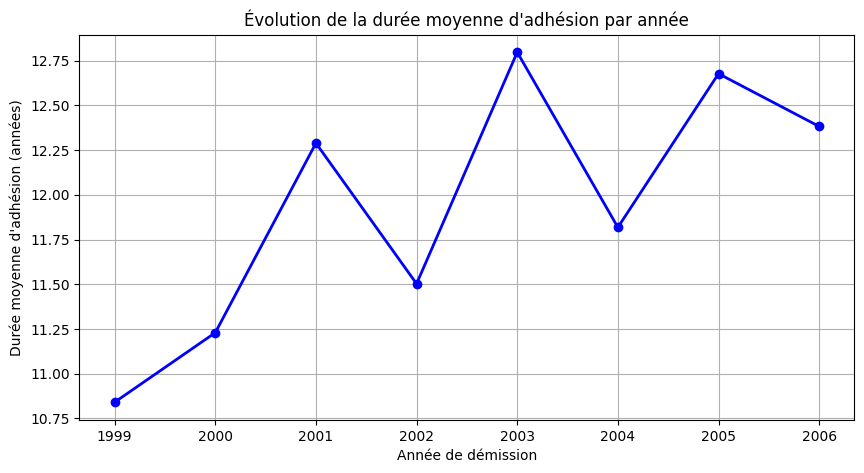

In [29]:
duree_moyenne_par_annee = df1.groupby('AnneeDemission')['DureeAdhesion'].mean()

plt.figure(figsize=(10, 5))
plt.plot(duree_moyenne_par_annee.index, duree_moyenne_par_annee.values, marker='o', linestyle='-', color='b', linewidth=2)

plt.xlabel("Année de démission")
plt.ylabel("Durée moyenne d'adhésion (années)")
plt.title("Évolution de la durée moyenne d'adhésion par année")
plt.grid(True)

plt.show()


####

## 3. Fusion

### Principe de fusion  
On estime qu'un client présent dans une table et dans une autre sera défini par les attributs suivants, qui seront considérés comme une clé primaire (identifiants du client) :  
- `Sexe`  
- `SituationFamiliale`  
- `ClientTypeCode`  
- `DateAdhesion`  
- `StatutSocietaireCode`  
- `MotifDemissionCode`  
- `RevenuMontant`  
- `NombreEnfants`  
- `DateDemission`  

### Ajouter la collone Target aux donnes

In [30]:
# Ajouter la colonne 'Target' à df1, fixée à 1 (démissionnaires)
df1['Target'] = 1

# Ajouter la colonne 'Target' à df2, définie en fonction de 'DateDemission'
df2['Target'] = df2['DateDemission'].apply(lambda x: 0 if x == "31/12/1900" else 1)

In [31]:
df1.head()

,ID,Sexe,RevenuMontant,NombreEnfants,SituationFamiliale,DateAdhesion,StatutSocietaireCode,DemissionCode,DateDemission,AnneeDemission,MotifDemissionCode,ClientTypeCode,AgeAdhesion,TrancheAgeAdhesion,AgeDemission,TrancheAgeDemission,DateDemissionCode,DureeAdhesion,TrancheDureeAdhesion,Target
0,1,2,0,0,A,04/04/1972,0,2,25/06/2003,2003,DV,21,33,3 31-35,64,9 61-65,5 2003,31,7 30-34,1
1,2,2,0,0,A,12/04/1972,0,2,06/07/2005,2005,DV,21,55,7 51-55,88,b 71-+,7 2005,33,7 30-34,1
2,3,2,0,0,B,19/07/1972,0,2,14/02/2001,2001,DV,21,39,4 36-40,68,a 66-70,3 2001,29,6 25-29,1
3,4,3,0,0,M,28/08/1972,0,2,09/03/2006,2006,DV,21,29,2 26-30,63,9 61-65,8 2006,34,7 30-34,1
4,5,2,0,0,A,06/11/1972,0,2,22/03/1999,1999,DV,21,45,5 41-45,72,b 71-+,1 1999,27,6 25-29,1


In [32]:
df2.head()

,ID,Sexe,DateNaissance,RevenuMontant,NombreEnfants,SituationFamiliale,DateAdhesion,StatutSocietaireCode,MotifDemissionCode,ClientTypeCode,ColonneInconnue,DateDemission,Target
0,1,1,0000-00-00,0,0,A,30/11/1998,0,NaN,98,0,31/12/1900,0
1,2,2,02/09/1939,0,0,M,21/02/1968,2,NaN,10,10807,31/12/1900,0
2,3,3,27/04/1941,1524,0,M,20/01/1970,2,NaN,10,16807,31/12/1900,0
3,4,2,05/03/1931,0,0,A,15/06/1970,0,DC,21,10807,31/12/1900,0
4,5,2,25/08/1935,1722,0,G,16/06/1970,2,NaN,10,10807,31/12/1900,0


In [33]:
df1.columns

Index(['ID', 'Sexe', 'RevenuMontant', 'NombreEnfants', 'SituationFamiliale',
       'DateAdhesion', 'StatutSocietaireCode', 'DemissionCode',
       'DateDemission', 'AnneeDemission', 'MotifDemissionCode',
       'ClientTypeCode', 'AgeAdhesion', 'TrancheAgeAdhesion', 'AgeDemission',
       'TrancheAgeDemission', 'DateDemissionCode', 'DureeAdhesion',
       'TrancheDureeAdhesion', 'Target'],
      dtype='object')

In [34]:
# Trouver l'intersection des colonnes des deux DataFrames
common_columns = list(set(df1.columns).intersection(set(df2.columns)))

# Exclure la colonne 'ID' si elle existe dans la liste des colonnes communes
common_columns = [col for col in common_columns if col != 'ID']

common_columns


['DateDemission',
 'Sexe',
 'Target',
 'RevenuMontant',
 'StatutSocietaireCode',
 'NombreEnfants',
 'SituationFamiliale',
 'MotifDemissionCode',
 'ClientTypeCode',
 'DateAdhesion']

In [35]:
common_columns

['DateDemission',
 'Sexe',
 'Target',
 'RevenuMontant',
 'StatutSocietaireCode',
 'NombreEnfants',
 'SituationFamiliale',
 'MotifDemissionCode',
 'ClientTypeCode',
 'DateAdhesion']

In [36]:
# Vérification des colonnes dans df1 et df2
print("Colonnes de df1:", df1.columns)

print("============================================")

print("Colonnes de df2:", df2.columns)


Colonnes de df1: Index(['ID', 'Sexe', 'RevenuMontant', 'NombreEnfants', 'SituationFamiliale',
       'DateAdhesion', 'StatutSocietaireCode', 'DemissionCode',
       'DateDemission', 'AnneeDemission', 'MotifDemissionCode',
       'ClientTypeCode', 'AgeAdhesion', 'TrancheAgeAdhesion', 'AgeDemission',
       'TrancheAgeDemission', 'DateDemissionCode', 'DureeAdhesion',
       'TrancheDureeAdhesion', 'Target'],
      dtype='object')
Colonnes de df2: Index(['ID', 'Sexe', 'DateNaissance', 'RevenuMontant', 'NombreEnfants',
       'SituationFamiliale', 'DateAdhesion', 'StatutSocietaireCode',
       'MotifDemissionCode', 'ClientTypeCode', 'ColonneInconnue',
       'DateDemission', 'Target'],
      dtype='object')


In [37]:
import pandas as pd

def merge_df(df1, df2, common_columns):
    # Supprimer la colonne ID dans les deux DataFrames avant la fusion
    df1 = df1.drop(columns=['ID'], errors='ignore')  # Ignore si 'ID' n'existe pas
    df2 = df2.drop(columns=['ID'], errors='ignore')  # Ignore si 'ID' n'existe pas

    # Fusionner les deux DataFrames en utilisant une jointure externe (outer join)
    df_final = pd.merge(df1, df2, on=common_columns, how='outer')

    # Réinitialiser l'index et assigner comme une colonne 'ID'
    df_final.reset_index(drop=False, inplace=True)
    df_final.rename(columns={'index': 'ID'}, inplace=True)  # Renommer la colonne 'index' en 'ID'

    return df_final



In [38]:
import numpy as np

def fill_unknown_date_demission(x):
    return np.nan if x == "31/12/1900" else x

def fill_unknown_date_naissance(x):
    return np.nan if x == "0000-00-00" else x

In [39]:
df_merged = merge_df(df1, df2, common_columns)

In [40]:
# Reconvertir la colonne DateNaissance en string
df_merged["DateNaissance"] = df_merged["DateNaissance"].astype(str)
df_merged["DateDemission"] = df_merged["DateDemission"].astype(str)
df_merged["DateAdhesion"] = df_merged["DateAdhesion"].astype(str)


# Appliquer la fonction de nettoyage
df_merged["DateNaissance"] = df_merged["DateNaissance"].apply(fill_unknown_date_naissance)
df_merged["DateDemission"] = df_merged["DateDemission"].apply(fill_unknown_date_demission)

# Reparser avec format explicite, et ignorer les NaN
df_merged["DateNaissance"] = pd.to_datetime(df_merged["DateNaissance"], format="%d/%m/%Y", errors="coerce")
df_merged["DateAdhesion"] = pd.to_datetime(df_merged["DateAdhesion"], format="%d/%m/%Y", errors="coerce")
df_merged["DateDemission"] = pd.to_datetime(df_merged["DateDemission"], format="%d/%m/%Y", errors="coerce")



In [41]:
df_merged.dtypes

,0
ID,int64
Sexe,int64
RevenuMontant,int64
NombreEnfants,int64
SituationFamiliale,object
DateAdhesion,datetime64[ns]
StatutSocietaireCode,int64
DemissionCode,float64
DateDemission,datetime64[ns]
AnneeDemission,float64


In [42]:
(df_merged.isna().mean() * 100).sort_values(ascending=False)


,0
DateNaissance,67.026307
ColonneInconnue,66.651127
TrancheDureeAdhesion,38.399378
DemissionCode,32.662893
AnneeDemission,32.662893
AgeDemission,32.662893
DureeAdhesion,32.662893
DateDemissionCode,32.662893
TrancheAgeDemission,32.662893
TrancheAgeAdhesion,32.662893


In [43]:
df_merged[ (~df_merged['AgeAdhesion'].isna()) & df_merged['TrancheAgeAdhesion'].isna()]

,ID,Sexe,RevenuMontant,NombreEnfants,SituationFamiliale,DateAdhesion,StatutSocietaireCode,DemissionCode,DateDemission,AnneeDemission,...,AgeAdhesion,TrancheAgeAdhesion,AgeDemission,TrancheAgeDemission,DateDemissionCode,DureeAdhesion,TrancheDureeAdhesion,Target,DateNaissance,ColonneInconnue


### Les tables avec toutes les colonnes

In [44]:
df_merged.columns

Index(['ID', 'Sexe', 'RevenuMontant', 'NombreEnfants', 'SituationFamiliale',
       'DateAdhesion', 'StatutSocietaireCode', 'DemissionCode',
       'DateDemission', 'AnneeDemission', 'MotifDemissionCode',
       'ClientTypeCode', 'AgeAdhesion', 'TrancheAgeAdhesion', 'AgeDemission',
       'TrancheAgeDemission', 'DateDemissionCode', 'DureeAdhesion',
       'TrancheDureeAdhesion', 'Target', 'DateNaissance', 'ColonneInconnue'],
      dtype='object')

In [45]:
columns_to_update = list(df1.columns.difference(df2.columns))
columns_to_update

['AgeAdhesion',
 'AgeDemission',
 'AnneeDemission',
 'DateDemissionCode',
 'DemissionCode',
 'DureeAdhesion',
 'TrancheAgeAdhesion',
 'TrancheAgeDemission',
 'TrancheDureeAdhesion']

In [46]:
def calculate_tranche_age_Adhesion(df):

    def get_tranche(age):
        if pd.isna(age):
            return None
        age = int(age)
        if age < 19:
            return '0 0-18' # !
        if 19 <= age <= 25:
            return '1 19-25'
        elif 26 <= age <= 30:
            return '2 26-30'
        elif 31 <= age <= 35:
            return '3 31-35'
        elif 36 <= age <= 40:
            return '4 36-40'
        elif 41 <= age <= 45:
            return '5 41-45'
        elif 46 <= age <= 50:
            return '6 46-50'
        elif 51 <= age <= 55:
            return '7 51-55'
        elif age >= 56:
            return '8 56-+'
        else:
            return None

    df['TrancheAgeAdhesion'] = df['AgeAdhesion'].apply(get_tranche)
    return df


def get_annee_from_date(date):
    return int(date.split('/')[2]) if isinstance(date, str) else None


def calculate_tranche_age_Demission(df):
    def get_tranche(age):
        if pd.isna(age):
            return None
        age = int(age)
        if 19 <= age <= 25:
            return '1 19-25'
        elif 26 <= age <= 30:
            return '2 26-30'
        elif 31 <= age <= 35:
            return '3 31-35'
        elif 36 <= age <= 40:
            return '4 36-40'
        elif 41 <= age <= 45:
            return '5 41-45'
        elif 46 <= age <= 50:
            return '6 46-50'
        elif 51 <= age <= 55:
            return '7 51-55'
        elif 56 <= age <= 60:
            return '8 56-60'
        elif 61 <= age <= 65:
            return '9 61-65'
        elif 66 <= age <= 70:
            return 'a 66-70'
        elif age >= 71:
            return 'b 71-+'
        else:
            return None

    df['TrancheAgeDemission'] = df['AgeDemission'].apply(get_tranche)
    return df


def calculate_tranche_duree_Adhesion(df):
    def get_tranche(duree):
        if pd.isna(duree):
            return None

        duree = int(duree)
        if duree < 1:
            return '0 0'
        elif 1 <= duree <= 4:
            return '1 1-4'
        elif 5 <= duree <= 9:
            return '2 5-9'
        elif 10 <= duree <= 14:
            return '3 10-14'
        elif 15 <= duree <= 19:
            return '4 15-19'
        elif 20 <= duree <= 24:
            return '5 20-24'
        elif 25 <= duree <= 29:
            return '6 25-29'
        elif 30 <= duree <= 34:
            return '7 30-34'
        else:
            return None

    df['TrancheDureeAdhesion'] = df['DureeAdhesion'].apply(get_tranche)
    return df


def complete_lack_columns(df):
    columns_to_update = ['AgeAdhesion', 'AgeDemission', 'AnneeDemission', 'DateDemissionCode', 'DureeAdhesion']

    print(df[ df['AgeAdhesion'].isna()].shape[0]/ df.shape[0])
    print(df[ df['TrancheAgeAdhesion'].isna()].shape[0]/ df.shape[0], 9999)

    for column_name in columns_to_update:

        if column_name == 'AgeAdhesion':
            mask = df['DateAdhesion'].notna() & df['DateNaissance'].notna()
            df.loc[mask, 'AgeAdhesion'] = (
                (df.loc[mask, 'DateAdhesion'] - df.loc[mask, 'DateNaissance']).dt.days // 365
            )

        elif column_name == 'AgeDemission':
            mask = df['DateDemission'].notna() & df['DateNaissance'].notna()
            df.loc[mask, 'AgeDemission'] = (
                (df.loc[mask, 'DateDemission'] - df.loc[mask, 'DateNaissance']).dt.days // 365
            )

        elif column_name == 'AnneeDemission':
            mask = df['DateDemission'].notna()
            df.loc[mask, 'AnneeDemission'] = df.loc[mask, 'DateDemission'].dt.year

        elif column_name == 'DateDemissionCode':
            mask = df['DateDemission'].notna()
            annee_demission = df.loc[mask, 'DateDemission'].dt.year
            code_part = (1999 - annee_demission + 1).astype(str)
            df.loc[mask, 'DateDemissionCode'] = 'f' + code_part + ' ' + annee_demission.astype(str)

        elif column_name == 'DureeAdhesion':
            mask = df['DateAdhesion'].notna() & df['DateDemission'].notna()
            df.loc[mask, 'DureeAdhesion'] = (
                (df.loc[mask, 'DateDemission'] - df.loc[mask, 'DateAdhesion']).dt.days // 365
            )

    # Appels aux fonctions de tranches (à définir si non déjà fait)
    df = calculate_tranche_age_Adhesion(df)
    print(df[ df['AgeAdhesion'].isna()].shape[0]/ df.shape[0])
    print(df[ df['TrancheAgeAdhesion'].isna()].shape[0]/ df.shape[0], 88888)

    df = calculate_tranche_age_Demission(df)
    df = calculate_tranche_duree_Adhesion(df)

    return df



In [47]:
updated_data = complete_lack_columns(df_merged)

0.3266289266289266
0.3266289266289266 9999
0.003751803751803752
0.003751803751803752 88888


In [48]:
updated_data['AgeAdhesion'].min(), updated_data['AgeAdhesion'].max()

(0.0, 89.0)

In [49]:
updated_data['TrancheAgeAdhesion'].value_counts()

,count
TrancheAgeAdhesion,
2 26-30,8413
3 31-35,6937
1 19-25,6326
4 36-40,6166
5 41-45,5152
6 46-50,4328
8 56-+,3581
7 51-55,3311
0 0-18,662


In [50]:
updated_data[ updated_data['AgeAdhesion'] == 0][['DateAdhesion', 'DateNaissance']]

,DateAdhesion,DateNaissance
31742,1990-03-08,1989-08-21
31751,2000-02-09,2000-01-12
31772,2000-05-10,2000-04-08
31952,1989-06-20,1989-03-22
32087,1987-09-28,1987-04-28
...,...,...
44143,2004-12-24,2004-08-04
44158,2007-03-27,2007-01-18
44159,1995-04-27,1994-10-04
44168,1991-11-28,1990-12-09


In [51]:
updated_data[ (~updated_data['AgeAdhesion'].isna()) & updated_data['TrancheAgeAdhesion'].isna()].shape[0]/ updated_data.shape[0]

0.0

In [52]:
(updated_data.isna().mean() * 100).sort_values(ascending=False)


,0
DateNaissance,67.026307
ColonneInconnue,66.651127
DemissionCode,32.662893
TrancheAgeDemission,32.154512
AgeDemission,32.141192
TrancheDureeAdhesion,32.136752
DureeAdhesion,32.132312
DateDemissionCode,32.132312
AnneeDemission,32.132312
DateDemission,32.132312


Selctionnons les colonnes utiles.

* **Colonnes probablement inutiles**

| Colonne                  | Pourquoi l’exclure ? |
|--------------------------|-----------------------|
| `DateDemission`          | **Futur connu** : cette variable **révèle** directement la cible (Target). On veut prédire **avant** la démission. |
| `AnneeDemission`         | Redondante avec `DateDemission` et **liée à la cible**. |
| `MotifDemissionCode`     | Aussi post-événement : connu **seulement après** la démission. |
| `AgeDemission`           | Calculé au moment de la démission → connu **après** l'événement. |
| `TrancheAgeDemission`    | Même raisonnement que ci-dessus. |
| `DateDemissionCode`      | Codage redondant de la date de démission. |
| `DemissionCode`          | Pas utile pour prédire, reflète **le fait accompli**. |
| `ColonneInconnue`        | Nom non explicite → à **explorer**, mais peut être inutile s’il n’a pas de sens métier. |
| `DateNaissance`          | Peut être convertie en âge à l'adhésion. Si `AgeAdhesion` existe déjà, celle-ci est **redondante**. |
| `ID`                     | Identifiant arbitraire sans lien avec le comportement → **à supprimer**.

---

* **Colonnes à vérifier**
- `TrancheAgeAdhesion`, `TrancheDureeAdhesion` : redondantes avec `AgeAdhesion`, `DureeAdhesion`.
- `DateAdhesion` : pourrait être transformée en **ancienneté**, sinon elle est un peu brute.

---

* **Colonnes potentiellement utiles**
Ces colonnes peuvent aider à modéliser le comportement de démission :
- `Sexe`
- `RevenuMontant`
- `NombreEnfants`
- `SituationFamiliale`
- `StatutSocietaireCode`
- `ClientTypeCode`
- `AgeAdhesion`
- `DureeAdhesion`
---



In [53]:
columns_to_delete = [col for col in updated_data.columns.tolist() if "Demission" in col] + ["ColonneInconnue", "ID"]

In [54]:
# Comme on a encore besoin de cette
columns_to_delete.remove("AnneeDemission")

In [55]:
clean_data = updated_data.drop(columns=columns_to_delete)

In [56]:
clean_data.columns

Index(['Sexe', 'RevenuMontant', 'NombreEnfants', 'SituationFamiliale',
       'DateAdhesion', 'StatutSocietaireCode', 'AnneeDemission',
       'ClientTypeCode', 'AgeAdhesion', 'TrancheAgeAdhesion', 'DureeAdhesion',
       'TrancheDureeAdhesion', 'Target', 'DateNaissance'],
      dtype='object')

In [57]:
clean_data.isna().sum() / clean_data.shape[0] * 100

,0
Sexe,0.000000
RevenuMontant,0.000000
NombreEnfants,0.000000
SituationFamiliale,0.000000
DateAdhesion,0.000000
StatutSocietaireCode,0.000000
AnneeDemission,32.132312
ClientTypeCode,0.000000
AgeAdhesion,0.375180
TrancheAgeAdhesion,0.375180


In [58]:
clean_data.head()

,Sexe,RevenuMontant,NombreEnfants,SituationFamiliale,DateAdhesion,StatutSocietaireCode,AnneeDemission,ClientTypeCode,AgeAdhesion,TrancheAgeAdhesion,DureeAdhesion,TrancheDureeAdhesion,Target,DateNaissance
0,2,0,0,A,1987-07-20,2,1995.0,10,35.0,3 31-35,7.0,2 5-9,1,1952-01-25
1,2,0,0,A,1987-07-17,2,1995.0,10,32.0,3 31-35,7.0,2 5-9,1,1954-11-19
2,3,0,0,M,1999-09-03,0,2000.0,21,33.0,3 31-35,0.0,0 0,1,NaT
3,3,0,0,M,1997-09-30,0,2000.0,21,54.0,7 51-55,2.0,1 1-4,1,NaT
4,3,0,0,M,1999-07-28,0,2000.0,25,47.0,6 46-50,0.0,0 0,1,NaT


Il faut noter que

` DureeAdhesion = 2007 - année(DateAdhesion) `

In [59]:
clean_data['AnneeDemission'] = clean_data['AnneeDemission'].fillna(2007)

In [60]:
clean_data['DureeAdhesion'] = clean_data['DateAdhesion'].apply(
    lambda x: 2007 - x.year if pd.notna(x) else None
)


In [61]:
clean_data = calculate_tranche_duree_Adhesion(clean_data)

In [62]:
clean_data = clean_data.drop(columns=["DateNaissance"])

Comme on a besoin AnneeDemission pour le decoupage des donnees on garde cette colonne.
Par default, les individu non deminisionnaire ont comme valeur NaN pour cette colonne `AnneeDemission`

Par ailleurs, etant donne que les colonne restante aveec de donnees manquantes en dessous de `1.6%` on a decider de les supprimer.

In [63]:
clean_data['Target'].value_counts()

,count
Target,
1,30571
0,14474


In [64]:
clean_data.isna().sum() / clean_data.shape[0] * 100

,0
Sexe,0.000000
RevenuMontant,0.000000
NombreEnfants,0.000000
SituationFamiliale,0.000000
DateAdhesion,0.000000
StatutSocietaireCode,0.000000
AnneeDemission,0.000000
ClientTypeCode,0.000000
AgeAdhesion,0.375180
TrancheAgeAdhesion,0.375180


In [65]:
df_clean = clean_data.dropna()

In [66]:
df_clean.isna().sum() / df_clean.shape[0] * 100

,0
Sexe,0.0
RevenuMontant,0.0
NombreEnfants,0.0
SituationFamiliale,0.0
DateAdhesion,0.0
StatutSocietaireCode,0.0
AnneeDemission,0.0
ClientTypeCode,0.0
AgeAdhesion,0.0
TrancheAgeAdhesion,0.0


In [67]:
df_clean['Target'].value_counts()

,count
Target,
1,30172
0,14017


In [68]:
df_clean.dtypes

,0
Sexe,int64
RevenuMontant,int64
NombreEnfants,int64
SituationFamiliale,object
DateAdhesion,datetime64[ns]
StatutSocietaireCode,int64
AnneeDemission,float64
ClientTypeCode,int64
AgeAdhesion,float64
TrancheAgeAdhesion,object


In [69]:
def split_tranche(x):
    return int(str(x).split(" ")[0])

In [70]:
df_clean = df_clean.copy()
df_clean['TrancheAgeAdhesion'] = df_clean['TrancheAgeAdhesion'].apply(split_tranche)
df_clean['TrancheDureeAdhesion'] = df_clean['TrancheDureeAdhesion'].apply(split_tranche)

In [71]:
df_clean['YearAdhesion'] = df_clean['DateAdhesion'].dt.year

In [72]:
df_clean = df_clean.drop(columns = ["DateAdhesion"])

In [73]:
categorical_cols = df_clean.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_cols

['SituationFamiliale']

In [74]:
numerical_cols = df_clean.select_dtypes(include=['int64', 'int32', 'float64']).columns.tolist()
numerical_cols.remove("Target")
numerical_cols

['Sexe',
 'RevenuMontant',
 'NombreEnfants',
 'StatutSocietaireCode',
 'AnneeDemission',
 'ClientTypeCode',
 'AgeAdhesion',
 'TrancheAgeAdhesion',
 'DureeAdhesion',
 'TrancheDureeAdhesion',
 'YearAdhesion']

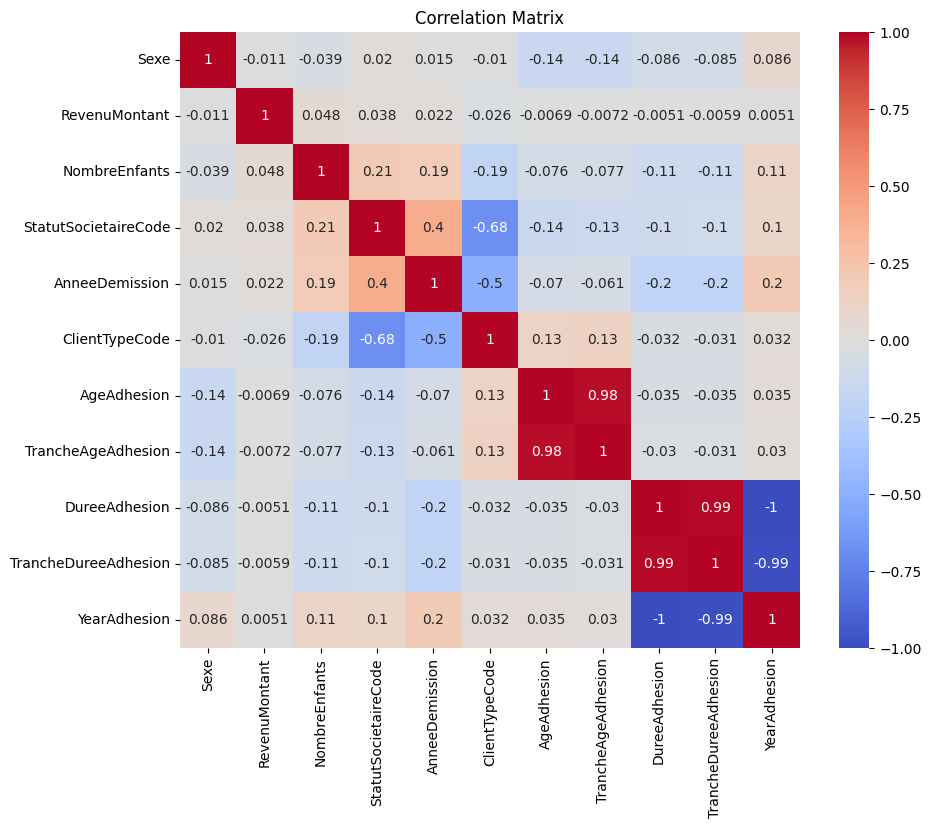

In [75]:
df_numerical = df_clean[numerical_cols]
plt.figure(figsize=(10, 8))
sns.heatmap(df_numerical.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

Les colonnes `AgeAdhesion` et `TrancheAgeAdhesion`;  `DureeAdhesion` et `TrancheDureeAdhesion`; `YearAdhesion` et `DureeAdhesion` sont tres fortement correlees.

On decide donc de garder `AgeAdhesion`, `DureeAdhesion`

In [76]:
numerical_cols = [col for col in numerical_cols if col not in ["TrancheAgeAdhesion", "TrancheDureeAdhesion", "YearAdhesion"]]

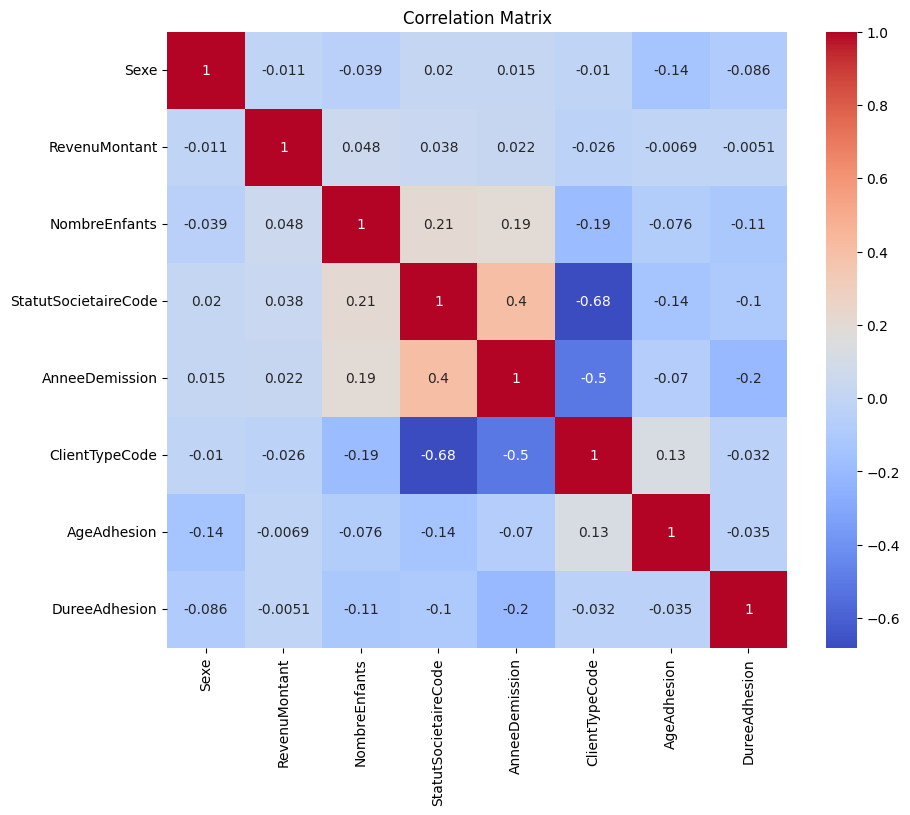

In [77]:
df_numerical = df_clean[numerical_cols]
plt.figure(figsize=(10, 8))
sns.heatmap(df_numerical.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [78]:
final_cols = numerical_cols + categorical_cols + ["Target"]

In [79]:
df_final = df_clean[final_cols]

In [80]:
df_final

,Sexe,RevenuMontant,NombreEnfants,StatutSocietaireCode,AnneeDemission,ClientTypeCode,AgeAdhesion,DureeAdhesion,SituationFamiliale,Target
0,2,0,0,2,1995.0,10,35.0,20,A,1
1,2,0,0,2,1995.0,10,32.0,20,A,1
2,3,0,0,0,2000.0,21,33.0,8,M,1
3,3,0,0,0,2000.0,21,54.0,10,M,1
4,3,0,0,0,2000.0,25,47.0,8,M,1
...,...,...,...,...,...,...,...,...,...,...
45040,3,1000,3,0,2004.0,21,42.0,3,M,1
45041,3,1625,0,0,2004.0,21,60.0,6,M,1
45042,3,1830,2,0,2004.0,21,36.0,8,E,1
45043,4,0,0,0,2004.0,21,24.0,7,C,1


In [81]:
df_final['Target'].value_counts()

,count
Target,
1,30172
0,14017


In [82]:
df_final.columns

Index(['Sexe', 'RevenuMontant', 'NombreEnfants', 'StatutSocietaireCode',
       'AnneeDemission', 'ClientTypeCode', 'AgeAdhesion', 'DureeAdhesion',
       'SituationFamiliale', 'Target'],
      dtype='object')

## Decoupage des donnees.



| Jeu         | Composition                                                                 |
|-------------|------------------------------------------------------------------------------|
| **Train**   | Sociétaires ayant démissionné **avant 2006** (`DateDemission <= 2005`) + un échantillon de non-démissionnaires présents à la même période |
| **Test**    | Sociétaires ayant démissionné **en 2006** + non-démissionnaires toujours présents fin 2007 |


In [83]:
# from sklearn.utils import resample
# import pandas as pd

# # 1. Séparer les démissionnaires
# train_demission = df_final[(df_final["Target"] == 1) & (df_final["AnneeDemission"] < 2006)]
# test_demission = df_final[(df_final["Target"] == 1) & (df_final["AnneeDemission"] == 2006)]

# # 2. Non-démissionnaires disponibles
# non_demissionnaires = df_final[df_final["Target"] == 0]

# # 3. Couper les non-démissionnaires en deux parts
# half = len(non_demissionnaires) // 2
# train_non_demission = non_demissionnaires.sample(n=half, random_state=42)
# test_non_demission = non_demissionnaires.drop(train_non_demission.index).sample(n=len(test_demission), random_state=42)

# # 4. Réduire les démissionnaires pour équilibrer
# train_demission_balanced = train_demission.sample(n=len(train_non_demission), random_state=42)

# # 5. Fusionner les sets et mélanger
# train_set = pd.concat([train_demission_balanced, train_non_demission]).sample(frac=1, random_state=42).reset_index(drop=True)
# test_set = pd.concat([test_demission, test_non_demission]).sample(frac=1, random_state=42).reset_index(drop=True)

# # 6. Vérification
# print("Train Set Target distribution:")
# print(train_set.shape)
# print(train_set['Target'].value_counts(normalize=True))
# print(test_set.shape)
# print("\nTest Set Target distribution:")
# print(test_set['Target'].value_counts(normalize=True))

In [84]:
from sklearn.utils import resample
import pandas as pd

# 1. Séparer les démissionnaires
train_demission = df_final[(df_final["Target"] == 1) & (df_final["AnneeDemission"] < 2006)]
test_demission = df_final[(df_final["Target"] == 1) & (df_final["AnneeDemission"] == 2006)]

# 2. Non-démissionnaires disponibles
non_demissionnaires = df_final[df_final["Target"] == 0]

# 3. Définir les tailles
# Pour 70% dém, 30% non-dém :
# -> 0.7 * total = n_dem -> total = n_dem / 0.7 => n_non_dem = total - n_dem
train_total = len(train_demission) / 0.7
train_non_dem_target_size = int(train_total - len(train_demission))

test_total = len(test_demission) / 0.7
test_non_dem_target_size = int(test_total - len(test_demission))

# 4. Échantillonner les non-démissionnaires
train_non_demission = non_demissionnaires.sample(n=train_non_dem_target_size, random_state=42)
remaining_non_dems = non_demissionnaires.drop(train_non_demission.index)
test_non_demission = remaining_non_dems.sample(n=test_non_dem_target_size, random_state=42)

# 5. Fusionner et mélanger
train_set = pd.concat([train_demission, train_non_demission]).sample(frac=1, random_state=42).reset_index(drop=True)
test_set = pd.concat([test_demission, test_non_demission]).sample(frac=1, random_state=42).reset_index(drop=True)

# 6. Vérification
print("Train Set:")
print(train_set.shape)
print(train_set['Target'].value_counts(normalize=True))  # Proportions

print("\nTest Set:")
print(test_set.shape)
print(test_set['Target'].value_counts(normalize=True))


Train Set:
(35955, 10)
Target
1    0.700014
0    0.299986
Name: proportion, dtype: float64

Test Set:
(7115, 10)
Target
1    0.70007
0    0.29993
Name: proportion, dtype: float64


In [85]:
train_set.shape, test_set.shape

((35955, 10), (7115, 10))

In [86]:
train_set

,Sexe,RevenuMontant,NombreEnfants,StatutSocietaireCode,AnneeDemission,ClientTypeCode,AgeAdhesion,DureeAdhesion,SituationFamiliale,Target
0,3,1549,0,2,2007.0,10,54.0,10,G,0
1,2,0,0,0,2001.0,21,32.0,12,A,1
2,3,0,0,0,2007.0,10,23.0,26,M,0
3,3,0,1,0,2003.0,21,52.0,4,M,1
4,3,0,0,0,2001.0,21,58.0,10,D,1
...,...,...,...,...,...,...,...,...,...,...
35950,2,0,0,0,2002.0,21,50.0,13,A,1
35951,3,0,0,2,2003.0,21,23.0,15,A,1
35952,3,0,0,0,2004.0,21,28.0,18,A,1
35953,3,0,0,0,2004.0,21,50.0,11,A,1


In [87]:
final_cols.remove("AnneeDemission")

In [88]:
y = train_set['Target']
features = [col for col in final_cols if col != "Target"]
X = train_set[features]

In [89]:
y_test = test_set['Target']
X_test = test_set[features]

## Entrainement de modele

In [95]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

def evaluate_classifiers(X, y,
                         numerical_columns,
                         categorical_columns,
                         numeric_scaler='standard',
                         categorical_encoder='onehot',
                         cv=5):

    scaler = StandardScaler() if numeric_scaler == 'standard' else MinMaxScaler()
    if categorical_encoder == 'onehot':
        encoder = OneHotEncoder(handle_unknown='ignore')
    else:
        encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

    numeric_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', scaler)
    ])

    categorical_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', encoder)
    ])

    preprocessor = ColumnTransformer([
        ('num', numeric_pipeline, numerical_columns),
        ('cat', categorical_pipeline, categorical_columns)
    ])

    classifiers = {
        'SVM': SVC(),
        'k-NN': KNeighborsClassifier(),
        'Naive Bayes': GaussianNB(),
        'Random Forest': RandomForestClassifier()
    }

    results = []

    for name, model in classifiers.items():
        pipeline = Pipeline([
            ('preprocessing', preprocessor),
            ('classifier', model)
        ])

        acc = cross_val_score(pipeline, X, y, cv=cv, scoring=make_scorer(accuracy_score)).mean()
        rec = cross_val_score(pipeline, X, y, cv=cv, scoring=make_scorer(recall_score, average='macro')).mean()
        prec = cross_val_score(pipeline, X, y, cv=cv, scoring=make_scorer(precision_score, average='macro')).mean()
        f1 = cross_val_score(pipeline, X, y, cv=cv, scoring=make_scorer(f1_score, average='macro')).mean()

        results.append({
            'Model': name,
            'Accuracy': round(acc, 3),
            'Recall': round(rec, 3),
            'Precision': round(prec, 3),
            'F1-Score': round(f1, 3)
        })

    return pd.DataFrame(results)


In [93]:
numerical_columns = [col for col in features if col != "SituationFamiliale"]
categorical_columns = ["SituationFamiliale"]

In [89]:
result_df = evaluate_classifiers(X, y,
                         numerical_columns,
                         categorical_columns,
                         numeric_scaler='standard',  # 'minmax' or 'standard'
                         categorical_encoder='onehot',  # 'onehot' or 'ordinal'
                         cv=5)

In [90]:
result_df

,Model,Accuracy,Recall,Precision,F1-Score
0,SVM,0.936,0.912,0.934,0.922
1,k-NN,0.935,0.914,0.930,0.922
2,Naive Bayes,0.879,0.852,0.861,0.854
3,Random Forest,0.935,0.915,0.928,0.920


In [ ]:
def evaluate_classifiers_with_combinations(X, y,
                                           numerical_columns,
                                           categorical_columns,
                                           scalers=['standard', 'minmax'],
                                           encoders=['onehot', 'ordinal'],
                                           cv=5):
    results = []

    # Iterate over all combinations of scalers and encoders
    for numeric_scaler in scalers:
        for categorical_encoder in encoders:
            print(f"Evaluating with {numeric_scaler} scaler and {categorical_encoder} encoder...")
            result = evaluate_classifiers(X, y,
                                          numerical_columns,
                                          categorical_columns,
                                          numeric_scaler=numeric_scaler,
                                          categorical_encoder=categorical_encoder,
                                          cv=cv)
            result['Scaler'] = numeric_scaler
            result['Encoder'] = categorical_encoder
            results.append(result)
    return results


results = evaluate_classifiers_with_combinations(X, y,
                                        numerical_columns,
                                        categorical_columns,
                                        scalers=['standard', 'minmax'],
                                        encoders=['onehot', 'ordinal'],
                                           cv=5)

Evaluating with standard scaler and onehot encoder...


In [ ]:
results

### Search for the best value for hyperparameter of each to get the best of each of them

In [90]:
from sklearn.model_selection import GridSearchCV

def train_and_tune_models_on_test(X_train, y_train, X_test, y_test,
                                   numerical_columns,
                                   categorical_columns,
                                   numeric_scaler='standard',
                                   categorical_encoder='onehot'):

    scaler = StandardScaler() if numeric_scaler == 'standard' else MinMaxScaler()
    encoder = OneHotEncoder(handle_unknown='ignore') if categorical_encoder == 'onehot' else OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

    numeric_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', scaler)
    ])

    categorical_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', encoder)
    ])

    preprocessor = ColumnTransformer([
        ('num', numeric_pipeline, numerical_columns),
        ('cat', categorical_pipeline, categorical_columns)
    ])

    models_and_params = {
        'SVM': (SVC(), {
            'classifier__C': [0.1, 1, 10],
            'classifier__kernel': ['rbf', 'linear']
        }),
        'k-NN': (KNeighborsClassifier(), {
            'classifier__n_neighbors': [3, 5, 7],
            'classifier__weights': ['uniform', 'distance']
        }),
        'Naive Bayes': (GaussianNB(), {}),  # no hyperparams to tune
        'Random Forest': (RandomForestClassifier(), {
            'classifier__n_estimators': [100, 200],
            'classifier__max_depth': [None, 10, 20]
        })
    }

    results = []

    for name, (model, param_grid) in models_and_params.items():
        pipeline = Pipeline([
            ('preprocessing', preprocessor),
            ('classifier', model)
        ])

        grid = GridSearchCV(
            pipeline,
            param_grid=param_grid,
            cv=5,
            scoring='f1_macro',
            n_jobs=-1
        )

        grid.fit(X_train, y_train)
        best_model = grid.best_estimator_

        # Test performance
        y_pred = best_model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        rec = recall_score(y_test, y_pred, average='macro')
        prec = precision_score(y_test, y_pred, average='macro')
        f1 = f1_score(y_test, y_pred, average='macro')

        results.append({
            'Model': name,
            'Best Params': grid.best_params_,
            'Accuracy': round(acc, 3),
            'Recall': round(rec, 3),
            'Precision': round(prec, 3),
            'F1-Score': round(f1, 3)
        })

    return pd.DataFrame(results)


In [96]:
result_tuned = train_and_tune_models_on_test(
    X, y, X_test, y_test,
    numerical_columns=numerical_columns,
    categorical_columns=categorical_columns,
    numeric_scaler='standard',
    categorical_encoder='onehot'
)


In [97]:
result_tuned

,Model,Best Params,Accuracy,Recall,Precision,F1-Score
0,SVM,"{'classifier__C': 10, 'classifier__kernel': 'r...",0.950,0.927,0.954,0.939
1,k-NN,"{'classifier__n_neighbors': 7, 'classifier__we...",0.937,0.912,0.935,0.923
2,Naive Bayes,{},0.830,0.824,0.797,0.807
3,Random Forest,"{'classifier__max_depth': 10, 'classifier__n_e...",0.889,0.882,0.862,0.871


In [98]:
def train_and_evaluate_on_test(X_train, y_train, X_test, y_test,
                                numerical_columns,
                                categorical_columns,
                                numeric_scaler='standard',
                                categorical_encoder='onehot',
                                result_tuned=None):
    # 1. Preprocessing
    scaler = StandardScaler() if numeric_scaler == 'standard' else MinMaxScaler()
    encoder = OneHotEncoder(handle_unknown='ignore') if categorical_encoder == 'onehot' else OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

    numeric_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', scaler)
    ])

    categorical_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', encoder)
    ])

    preprocessor = ColumnTransformer([
        ('num', numeric_pipeline, numerical_columns),
        ('cat', categorical_pipeline, categorical_columns)
    ])

    classifiers = {
        'SVM': SVC(),
        'k-NN': KNeighborsClassifier(),
        'Naive Bayes': GaussianNB(),
        'Random Forest': RandomForestClassifier()
    }

    results = []

    for name, model in classifiers.items():
        # Get the best parameters from the tuned models DataFrame
        best_params_row = result_tuned[result_tuned['Model'] == name]

        # If there are no best params, use an empty dictionary
        if not best_params_row.empty:
            best_params = best_params_row['Best Params'].iloc[0]

            # Check if 'Best Params' is a string (in case it's still a string representation of a dictionary)
            if isinstance(best_params, str):
                best_params = eval(best_params)  # Convert string to dictionary if needed

            # Remove 'classifier__' prefix from parameter names if not empty
            best_params = {k.replace('classifier__', ''): v for k, v in best_params.items()}
        else:
            best_params = {}

        # print(best_params)

        # Update the model with the best parameters
        model.set_params(**best_params)

        pipeline = Pipeline([
            ('preprocessing', preprocessor),
            ('classifier', model)
        ])

        # Train the model with the best parameters
        pipeline.fit(X_train, y_train)

        # Predict
        y_pred = pipeline.predict(X_test)

        # Evaluate
        acc = accuracy_score(y_test, y_pred)
        rec = recall_score(y_test, y_pred, average='macro')
        prec = precision_score(y_test, y_pred, average='macro')
        f1 = f1_score(y_test, y_pred, average='macro')

        results.append({
            'Model': name,
            'Best Params': best_params,
            'Accuracy': round(acc, 3),
            'Recall': round(rec, 3),
            'Precision': round(prec, 3),
            'F1-Score': round(f1, 3)
        })

    return pd.DataFrame(results)


In [99]:
result_test = train_and_evaluate_on_test(
    X, y, X_test, y_test,
    numerical_columns=numerical_columns,
    categorical_columns=categorical_columns,
    numeric_scaler='standard',
    categorical_encoder='onehot',
    result_tuned = result_tuned
)

In [100]:
result_test

,Model,Best Params,Accuracy,Recall,Precision,F1-Score
0,SVM,"{'C': 10, 'kernel': 'rbf'}",0.950,0.927,0.954,0.939
1,k-NN,"{'n_neighbors': 7, 'weights': 'uniform'}",0.937,0.912,0.935,0.923
2,Naive Bayes,{},0.830,0.824,0.797,0.807
3,Random Forest,"{'max_depth': 10, 'n_estimators': 100}",0.887,0.879,0.861,0.869
